### Which vendors contribute the most total purchase dollars ?

In [27]:
vendor_perfomance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProffit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [28]:
# Calculate total purchase for all vendors
total_purchase = vendor_perfomance['TotalPurchaseDollars'].sum()

In [29]:
# Compute each vendor's contribution to total purchase
vendor_perfomance['PurchaseContribution%'] = vendor_perfomance['TotalPurchaseDollars'] / total_purchase

In [30]:
vendor_perfomance = vendor_perfomance.round(2)

In [31]:
vendor_performance = round(vendor_perfomance.sort_values('PurchaseContribution%', ascending = False), 2)


In [32]:
# Sort by contribution
vendor_performance = round(vendor_perfomance.sort_values('PurchaseContribution%', ascending=False), 2)

# Pick top 10 vendors
top_vendors = vendor_performance.head(10)

# Format dollar columns
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProffit'] = top_vendors['GrossProffit'].apply(format_dollars)

# Convert contribution to percentage (without % sign)
top_vendors['PurchaseContribution%'] = top_vendors['PurchaseContribution%'].apply(lambda x: round(x * 100, 2))

# Show table
top_vendors



,VendorName,TotalPurchaseDollars,GrossProffit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.0
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,8.0
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.0
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,8.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,6.0
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,5.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,4.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.0
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,4.0
61,MOET HENNESSY USA INC,9.25M,4.11M,13.36M,3.0


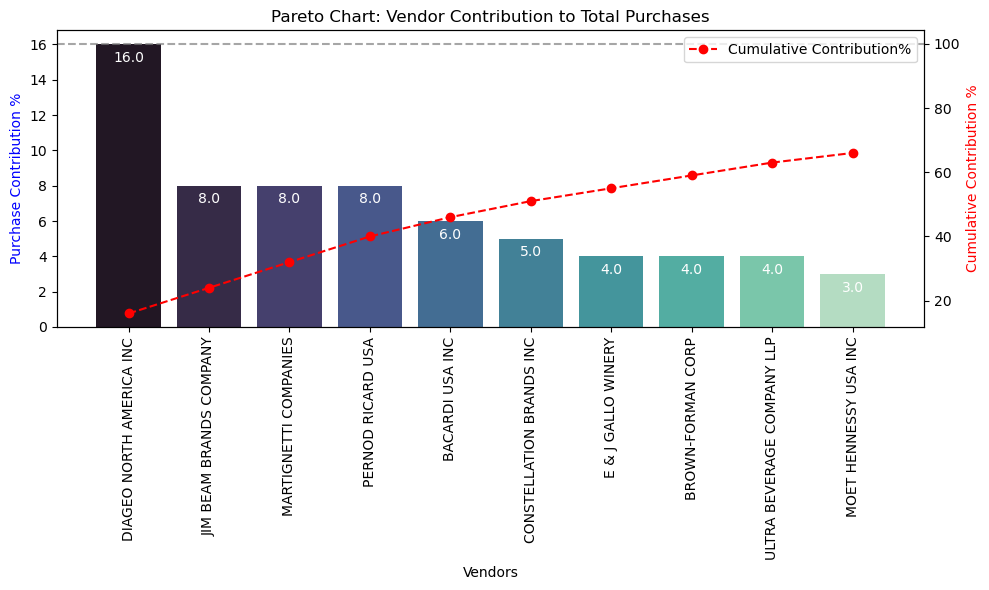

In [33]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], 
            y=top_vendors['PurchaseContribution%'], 
            palette="mako", 
            ax=ax1)

# Add value labels on bars (formatted to 1 decimal place, no % sign)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}", ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], 
         top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution%')

# Labels and styling
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Optional horizontal line at 100%
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()